# music21

music21 in conda installieren: `conda install -c iainsgillis music21`

Sollte ein Fehler auftreten, dann vorher aktualisieren: `conda update --all`

In [1]:
from music21 import *

# Tonstufenanalyse

In [2]:
# Stück laden
entchen = converter.parse('AlleMeineEntchen.xml')
# erweiterte Pfade auch möglich
# entchen = converter.parse('../../music21/code/AlleMeineEntchen.xml')

In [3]:
entchen

<music21.stream.Score 0x7f4ee7942890>

In [4]:
entchenFlatNotes = entchen.flat.notes
entchenFlatNotes

<music21.stream.iterator.StreamIterator for Score:0x7f4ee7942890_flat @:0>

In [5]:
# Dictionary anlegen um die Tonstufen abzuspeichern
entchenSteps = {
    "C": 0,
    "D": 0,
    "E": 0,
    "F": 0,
    "G": 0,
    "A": 0,
    "B": 0
}

In [6]:
# über den Stream iterieren
for note in entchenFlatNotes:
    # wenn das Element keine Tonstufe hat, dann ist es keine Note
    # und wirft einen AttributeError
    try:
        # ist es eine Note
        thisNoteStep = note.step
    except AttributeError:
        try:
            # ist es ein Akkord
            thisChordPitches = note.pitches
            for pitch in thisChordPitches:
                entchenSteps[pitch.step] = entchenSteps[pitch.step] + 1
        except AttributeError:
            continue
        continue
    # zum Tonstufendictionary hinzufügen
    entchenSteps[thisNoteStep] = entchenSteps[thisNoteStep] + 1


In [7]:
# Ergebnis ausgeben
print('Tonstufen in alle meine Entchen:')
for step,n in entchenSteps.items():
    print("Die Tonstufe {} kommt {:4} mal vor.".format(step, n))


Tonstufen in alle meine Entchen:
Die Tonstufe C kommt    9 mal vor.
Die Tonstufe D kommt    7 mal vor.
Die Tonstufe E kommt    8 mal vor.
Die Tonstufe F kommt    8 mal vor.
Die Tonstufe G kommt   11 mal vor.
Die Tonstufe A kommt   10 mal vor.
Die Tonstufe B kommt    2 mal vor.


In [8]:
entchenSteps.keys()

dict_keys(['C', 'D', 'E', 'F', 'G', 'A', 'B'])

# Graph
from: https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py

In [9]:
import matplotlib.pyplot as plt
import numpy as np

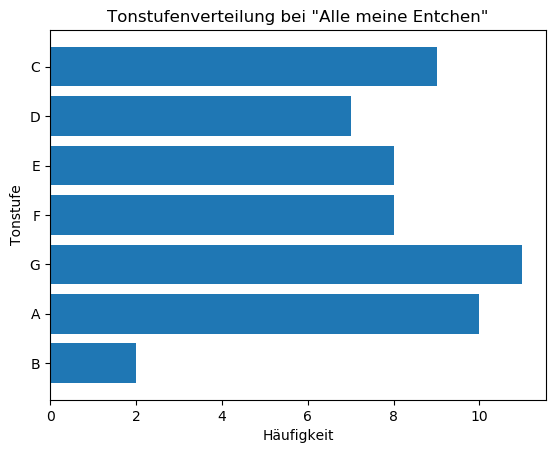

In [10]:
# Fixing random state for reproducibility
# np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
#people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
tonstufen = entchenSteps.keys()
pos = np.arange(len(tonstufen))
#performance = 3 + 10 * np.random.rand(len(people))
anzahl = entchenSteps.values()
#error = np.random.rand(len(people))

ax.barh(pos, anzahl, align='center')
ax.set_yticks(pos)
ax.set_yticklabels(tonstufen)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Tonstufe')
ax.set_xlabel('Häufigkeit')
ax.set_title('Tonstufenverteilung bei "Alle meine Entchen"')

plt.show()

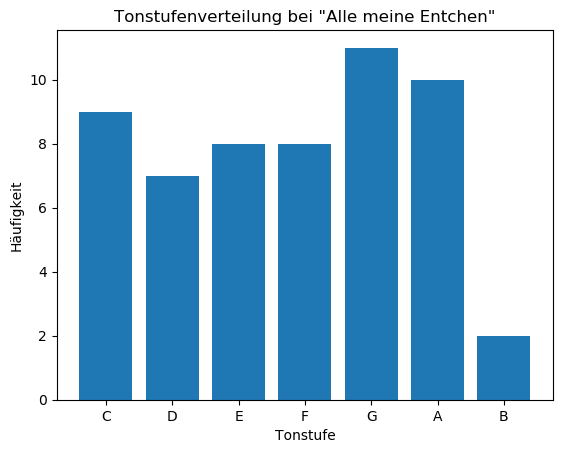

In [11]:
plt.rcdefaults()
fig, ax = plt.subplots()

tonstufen = entchenSteps.keys()
pos = np.arange(len(tonstufen))
anzahl = entchenSteps.values()

ax.bar(pos, anzahl, align='center')
ax.set_xticks(pos)
ax.set_xticklabels(tonstufen)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Tonstufe')
ax.set_ylabel('Häufigkeit')
ax.set_title('Tonstufenverteilung bei "Alle meine Entchen"')

plt.show()

# Intervallanalyse

In [12]:
music = converter.parse('AlleMeineEntchen.xml')
musicNotes = music.flat.notesAndRests

In [13]:
musicNotes

<music21.stream.iterator.StreamIterator for Score:0x7f4ee71d3e10_flat @:0>

In [14]:
for note in musicNotes[:10]:
    print(note)

<music21.harmony.ChordSymbol C>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note G>
<music21.harmony.ChordSymbol F>
<music21.note.Note A>
<music21.note.Note A>


In [15]:
intervals = {}

In [16]:
for i, note in enumerate(musicNotes):
    if i == 0 or previousMidi == -1:
        try:
            previousMidi = note.pitch.midi
        except:
            previousMidi = -1
        continue
    # print(i, note)

    try:
        thisMidi = note.pitch.midi
        # print(thisMidi)
    except AttributeError:
        continue

    # previousMidi = musicNotes[i-1].pitch.midi
    # print(thisMidi, previousMidi)
    interval = thisMidi - previousMidi
    # print(interval)
    try:
        intervals[interval] = intervals[interval] + 1
    except KeyError:
        intervals[interval] = 1



    previousMidi = thisMidi


In [17]:
for i in sorted(intervals.keys()):
    print('Das Interval {:3} kommt {:3} Mal vor.'.format(i, intervals[i]))
print('='*60)

Das Interval  -2 kommt   5 Mal vor.
Das Interval  -1 kommt   1 Mal vor.
Das Interval   0 kommt  14 Mal vor.
Das Interval   1 kommt   1 Mal vor.
Das Interval   2 kommt   5 Mal vor.


In [18]:
intervalsSortedItems = sorted(intervals.items(), key =  lambda kv:(kv[1], kv[0]))
for i in intervalsSortedItems:
    print('Das Interval {:3} kommt {:3} Mal vor.'.format(i[0], i[1]))

Das Interval  -1 kommt   1 Mal vor.
Das Interval   1 kommt   1 Mal vor.
Das Interval  -2 kommt   5 Mal vor.
Das Interval   2 kommt   5 Mal vor.
Das Interval   0 kommt  14 Mal vor.


In [19]:
result_x = []
result_y = []
intervalsSortedItems = sorted(intervals.items(), key =  lambda kv:(kv[1], kv[0]))
intervalsSortedItems = sorted(intervals.items())
for i in intervalsSortedItems:
    print('Das Interval {:3} kommt {:3} Mal vor.'.format(i[0], i[1]))
    result_x.append(i[0])
    result_y.append(i[1])


Das Interval  -2 kommt   5 Mal vor.
Das Interval  -1 kommt   1 Mal vor.
Das Interval   0 kommt  14 Mal vor.
Das Interval   1 kommt   1 Mal vor.
Das Interval   2 kommt   5 Mal vor.


In [20]:
intervalsSortedItems

[(-2, 5), (-1, 1), (0, 14), (1, 1), (2, 5)]

[-2, -1, 0, 1, 2]


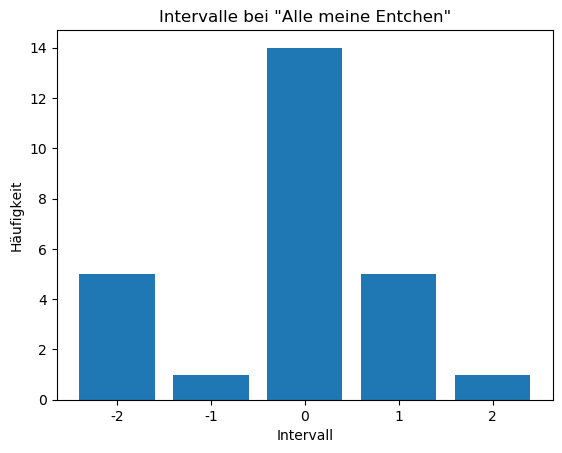

In [21]:
plt.rcdefaults()
fig, ax = plt.subplots()

intervalle = result_x
print(intervalle)
pos = np.arange(len(intervalle))
anzahl = intervals.values()

ax.bar(pos, anzahl, align='center')
ax.set_xticks(pos)
ax.set_xticklabels(intervalle)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Intervall')
ax.set_ylabel('Häufigkeit')
ax.set_title('Intervalle bei "Alle meine Entchen"')

plt.show()